# Effect of outliers on Neural network's Performance

### Why iam doing this?


> I always wondered how neural network deal with outliers mainly with Relu as activation function because as we know sigmoid in logistic regression is especially used for squashing but relu does have that property of squashing .

> So i thought to experiment with NN with relu under various situations.


In [0]:
import warnings
warnings.filterwarnings("ignore")

from csv import reader
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


Using TensorFlow backend.


   #### Iam using california housing prediction regression problem 
   
> Data Set Characteristics:

Number of Instances:20640

Number of Attributes:8 numeric, predictive attributes and the target

Attribute Information:
 	
MedInc: median income in block

HouseAge_: median house age in block

AveRooms :average number of rooms

AveBedrms: average number of bedrooms

Population block population

AveOccup :average house occupancy

Latitude house block latitude

Longitude house block longitude 

https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset

In [0]:
from sklearn.datasets import fetch_california_housing

d = fetch_california_housing()


In [0]:
feature_names = d['feature_names']
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



In [0]:
da=pd.DataFrame(d.data, columns= ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])

In [0]:
print('shape of data :', da.shape)
da.head()

shape of data : (20640, 8)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Univariate analysis

 Analysis each feature individually by using boxplots

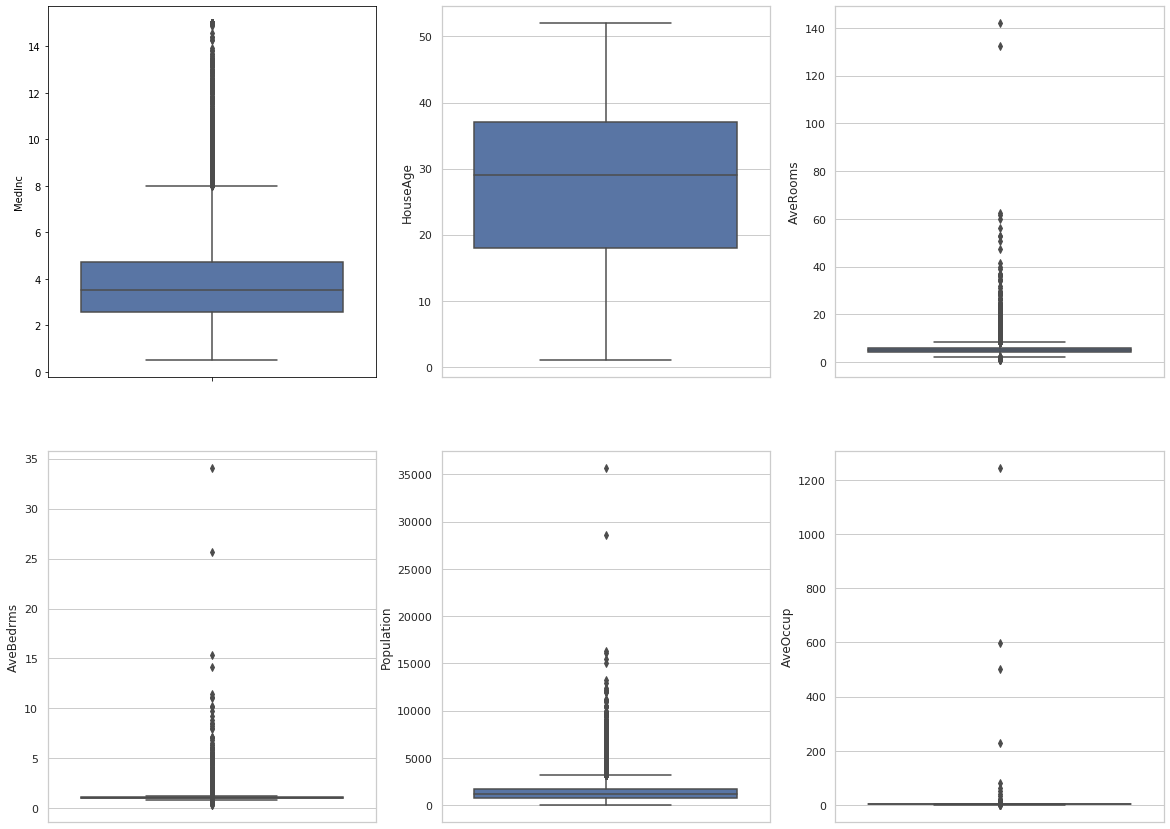

In [0]:
import seaborn as sns

plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.set(style="whitegrid") 
ax = sns.boxplot(y=da['MedInc'])
plt.subplot(2,3,2)
ax = sns.boxplot(y=da['HouseAge'])

plt.subplot(2,3,3)
ax = sns.boxplot(y=da['AveRooms'])

plt.subplot(2,3,4)
ax = sns.boxplot(y=da['AveBedrms'])

plt.subplot(2,3,5)
ax = sns.boxplot(y=da['Population'])

plt.subplot(2,3,6)
ax = sns.boxplot(y=da['AveOccup'])



After watching plots of 6 features i can say that there are some extremities/outliers especially in AveRooms ,AveBedrooms ,population and Average occupation.

# PART 1

In [0]:
# splitting data without removing extremities
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(da, d.target,test_size = 0.30,)

##### Standardising data

In [0]:
from sklearn.preprocessing import StandardScaler

sc=preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
print('dimension of train :',X_train.shape)
print('dimension of test: ',X_test.shape)


dimension of train : (14448, 8)
dimension of test:  (6192, 8)


 Just training with linear regression to see resultant error

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
valid_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

In [0]:
from sklearn.metrics import mean_squared_error

print('error on train by using linear regression',mean_squared_error(y_train, train_pred))
print('error on test by using linear regression',mean_squared_error(y_test,valid_pred))


error on train by using linear regression 0.5217441346520719
error on test by using linear regression 0.5306706395698603


In [0]:
def summarize_diagnostics(history):

    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.show


#### TRAINING NN with RELU


### Model 1 with relu









Train on 14448 samples, validate on 6192 samples
Epoch 1/600





14448/14448 [==============================] - 1s 57us/step - loss: 5.3265 - val_loss: 4.2313
Epoch 2/600
14448/14448 [==============================] - 1s 41us/step - loss: 3.6638 - val_loss: 3.1046
Epoch 3/600
14448/14448 [==============================] - 1s 42us/step - loss: 2.7310 - val_loss: 2.3511
Epoch 4/600
14448/14448 [==============================] - 1s 42us/step - loss: 2.1220 - val_loss: 1.8738
Epoch 5/600
14448/14448 [==============================] - 1s 45us/step - loss: 1.7524 - val_loss: 1.5986
Epoch 6/600
14448/14448 [==============================] - 1s 43us/step - loss: 1.5435 - val_loss: 1.4359
Epoch 7/600
14448/14448 [==============================] - 1s 43us/step - loss: 1.3954 - val_loss: 1.3064
Epoch 8/600
14448/14448 [==============================] - 1s 44us/step - loss: 1.2598 - val_loss: 1.1561
Epoch 9/600
14448/14448 [==============================] - 1s 42us/step - loss: 1.1098 - va

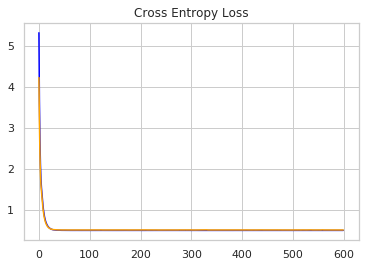

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(1 ,activation='relu', input_shape=(8,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)


### Model 1 with sigmoid


Train on 14448 samples, validate on 6192 samples
Epoch 1/600
14448/14448 [==============================] - 1s 53us/step - loss: 2.3008 - val_loss: 1.5599
Epoch 2/600
14448/14448 [==============================] - 1s 39us/step - loss: 1.1612 - val_loss: 0.9684
Epoch 3/600
14448/14448 [==============================] - 1s 43us/step - loss: 0.8577 - val_loss: 0.8053
Epoch 4/600
14448/14448 [==============================] - 1s 42us/step - loss: 0.7479 - val_loss: 0.7193
Epoch 5/600
14448/14448 [==============================] - 1s 48us/step - loss: 0.6781 - val_loss: 0.6586
Epoch 6/600
14448/14448 [==============================] - 1s 43us/step - loss: 0.6256 - val_loss: 0.6120
Epoch 7/600
14448/14448 [==============================] - 1s 43us/step - loss: 0.5832 - val_loss: 0.5740
Epoch 8/600
14448/14448 [==============================] - 1s 43us/step - loss: 0.5477 - val_loss: 0.5422
Epoch 9/600
14448/14448 [==============================] - 1s 43us/step - loss: 0.5180 - val_loss: 0.51

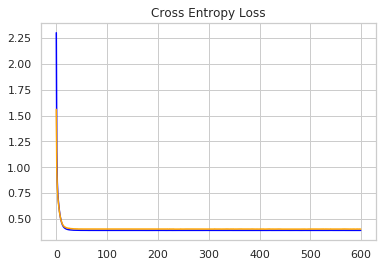

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(8,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)


### Model 2 with relu


Train on 14448 samples, validate on 6192 samples
Epoch 1/600
14448/14448 [==============================] - 1s 79us/step - loss: 0.7133 - val_loss: 0.5034
Epoch 2/600
14448/14448 [==============================] - 1s 50us/step - loss: 0.4216 - val_loss: 0.6245
Epoch 3/600
14448/14448 [==============================] - 1s 51us/step - loss: 0.8555 - val_loss: 0.3949
Epoch 4/600
14448/14448 [==============================] - 1s 51us/step - loss: 0.4053 - val_loss: 0.3830
Epoch 5/600
14448/14448 [==============================] - 1s 50us/step - loss: 0.3864 - val_loss: 0.3675
Epoch 6/600
14448/14448 [==============================] - 1s 51us/step - loss: 0.3545 - val_loss: 0.3663
Epoch 7/600
14448/14448 [==============================] - 1s 51us/step - loss: 0.3605 - val_loss: 0.3544
Epoch 8/600
14448/14448 [==============================] - 1s 53us/step - loss: 0.3421 - val_loss: 0.3634
Epoch 9/600
14448/14448 [==============================] - 1s 52us/step - loss: 0.3596 - val_loss: 0.54

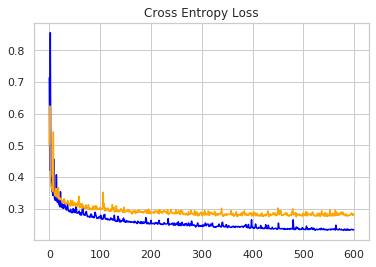

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600 ,validation_data=(X_test, y_test))
summarize_diagnostics(history)


### Model 2 with sigmoid


Train on 14448 samples, validate on 6192 samples
Epoch 1/600
14448/14448 [==============================] - 1s 87us/step - loss: 0.7330 - val_loss: 0.5199
Epoch 2/600
14448/14448 [==============================] - 1s 60us/step - loss: 0.4993 - val_loss: 0.5114
Epoch 3/600
14448/14448 [==============================] - 1s 59us/step - loss: 0.4813 - val_loss: 0.4863
Epoch 4/600
14448/14448 [==============================] - 1s 60us/step - loss: 0.4749 - val_loss: 0.5178
Epoch 5/600
14448/14448 [==============================] - 1s 57us/step - loss: 0.4738 - val_loss: 0.4809
Epoch 6/600
14448/14448 [==============================] - 1s 54us/step - loss: 0.4625 - val_loss: 0.4833
Epoch 7/600
14448/14448 [==============================] - 1s 53us/step - loss: 0.4606 - val_loss: 0.4762
Epoch 8/600
14448/14448 [==============================] - 1s 53us/step - loss: 0.4570 - val_loss: 0.4635
Epoch 9/600
14448/14448 [==============================] - 1s 51us/step - loss: 0.4492 - val_loss: 0.47

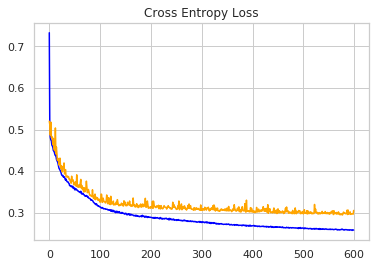

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(8,)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600,validation_data=(X_test, y_test))
summarize_diagnostics(history)

# PART 2

## Removing extreme points

In [0]:
print('25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEROOMS:',np.percentile(da.AveRooms, [25,55,75,100]))
print('99TH AND 100TH PERCENTILES OF FEATURE AVEROOMS:',np.percentile(da.AveRooms, [99,100]))


25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEROOMS: [  4.44071624   5.375        6.05238095 141.90909091]
99TH AND 100TH PERCENTILES OF FEATURE AVEROOMS: [ 10.35703302 141.90909091]


In [0]:
print('25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEOCCUP:',np.percentile(da.AveOccup, [25,55,75,100]))
print('99TH AND 100TH PERCENTILES OF FEATURE AVEOCCUPS:',np.percentile(da.AveOccup, [99,100]))

25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEOCCUP: [   2.42974115    2.89550479    3.28226092 1243.33333333]
99TH AND 100TH PERCENTILES OF FEATURE AVEOCCUPS: [   5.39481203 1243.33333333]


In [0]:
print('25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE  population:',np.percentile(da. Population, [25,55,75,100]))
print('99TH AND 100TH PERCENTILES OF FEATURE population:',np.percentile(da.Population, [99,100]))

25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE  population: [  787.  1255.  1725. 35682.]
99TH AND 100TH PERCENTILES OF FEATURE population: [ 5805.83 35682.  ]


In [0]:
print('25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEBEDRMS:',np.percentile(da.AveBedrms, [25,55,75,100]))
print('99TH AND 100TH PERCENTILES OF FEATURE AVEBEDRMS:',np.percentile(da.AveBedrms, [99,100]))

25TH,55TH,75TH AND 100TH PERCENTILES OF FEATURE AVEBEDRMS: [ 1.00607905  1.05712292  1.09952607 34.06666667]
99TH AND 100TH PERCENTILES OF FEATURE AVEBEDRMS: [ 2.12754082 34.06666667]


In [0]:
#Selected these limits based on iqr.
dy=pd.DataFrame(d['target'])
a=np.where(da.AveRooms>=12)
da.drop(da.index[a],inplace=True)
dy.drop(dy.index[a],inplace=True)

In [0]:

b=np.where(da.AveOccup>=6)
da.drop(da.index[b],inplace=True)
dy.drop(dy.index[b],inplace=True)

In [0]:
c=np.where(da.AveBedrms>=3)
da.drop(da.index[c],inplace=True)
dy.drop(dy.index[c],inplace=True)

In [0]:
D=np.where(da.Population>=5810)
da.drop(da.index[D],inplace=True)
dy.drop(dy.index[D],inplace=True)

In [0]:
print('shape of data after removing extremities/outliers',da.shape)
print ('Total percentage of datapoints removed are:',(((20640-20180)/20680)*100))

shape of data after removing extremities/outliers (20180, 8)
Total percentage of datapoints removed are: 2.2243713733075436


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(da, dy,test_size = 0.30)
print('dimension of train :',X_train.shape)
print('dimension of test: ',X_test.shape)

dimension of train : (14126, 8)
dimension of test:  (6054, 8)


In [0]:
# STANDARDISING 

from sklearn.preprocessing import StandardScaler

sc=preprocessing.StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train.shape

(14126, 8)

In [0]:
lm = LinearRegression()
lm.fit(X=X_train, y=y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)
valid_pred = lm.predict(X_test)
train_pred = lm.predict(X_train)

In [0]:

print('error on train by using linear regression',mean_squared_error(y_train, train_pred))
print('error on test by using linear regression',mean_squared_error(y_test,valid_pred))



error on train by using linear regression 0.4567261031040791
error on test by using linear regression 0.4187001516635067


##### Training NN 


### Model 1 with relu


Train on 14126 samples, validate on 6054 samples
Epoch 1/600
14126/14126 [==============================] - 1s 71us/step - loss: 3.6874 - val_loss: 2.5740
Epoch 2/600
14126/14126 [==============================] - 1s 47us/step - loss: 2.0739 - val_loss: 1.4169
Epoch 3/600
14126/14126 [==============================] - 1s 48us/step - loss: 1.0929 - val_loss: 0.7245
Epoch 4/600
14126/14126 [==============================] - 1s 47us/step - loss: 0.6788 - val_loss: 0.5402
Epoch 5/600
14126/14126 [==============================] - 1s 48us/step - loss: 0.5614 - val_loss: 0.4855
Epoch 6/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.5145 - val_loss: 0.4569
Epoch 7/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.4861 - val_loss: 0.4368
Epoch 8/600
14126/14126 [==============================] - 1s 48us/step - loss: 0.4663 - val_loss: 0.4223
Epoch 9/600
14126/14126 [==============================] - 1s 47us/step - loss: 0.4540 - val_loss: 0.41

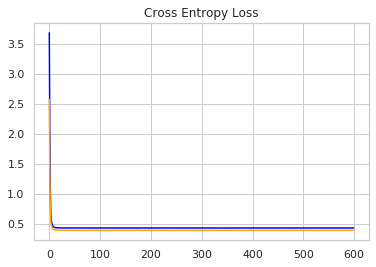

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(1, activation='relu', input_shape=(8,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)


### Model 1 with sigmoid


Train on 14126 samples, validate on 6054 samples
Epoch 1/600
14126/14126 [==============================] - 1s 78us/step - loss: 3.4936 - val_loss: 2.3429
Epoch 2/600
14126/14126 [==============================] - 1s 46us/step - loss: 1.8444 - val_loss: 1.2822
Epoch 3/600
14126/14126 [==============================] - 1s 48us/step - loss: 1.1504 - val_loss: 0.9340
Epoch 4/600
14126/14126 [==============================] - 1s 49us/step - loss: 0.9172 - val_loss: 0.8028
Epoch 5/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.8034 - val_loss: 0.7134
Epoch 6/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.7163 - val_loss: 0.6369
Epoch 7/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.6420 - val_loss: 0.5711
Epoch 8/600
14126/14126 [==============================] - 1s 45us/step - loss: 0.5809 - val_loss: 0.5192
Epoch 9/600
14126/14126 [==============================] - 1s 46us/step - loss: 0.5326 - val_loss: 0.47

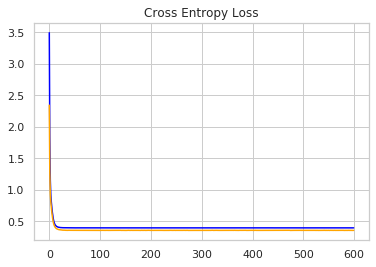

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_shape=(8,)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)

### Model 2 with relu

Train on 14126 samples, validate on 6054 samples
Epoch 1/600
14126/14126 [==============================] - 1s 101us/step - loss: 0.6139 - val_loss: 0.3837
Epoch 2/600
14126/14126 [==============================] - 1s 52us/step - loss: 0.3911 - val_loss: 0.3453
Epoch 3/600
14126/14126 [==============================] - 1s 53us/step - loss: 0.3738 - val_loss: 0.3281
Epoch 4/600
14126/14126 [==============================] - 1s 55us/step - loss: 0.3676 - val_loss: 0.3281
Epoch 5/600
14126/14126 [==============================] - 1s 55us/step - loss: 0.3568 - val_loss: 0.3250
Epoch 6/600
14126/14126 [==============================] - 1s 52us/step - loss: 0.3509 - val_loss: 0.3479
Epoch 7/600
14126/14126 [==============================] - 1s 53us/step - loss: 0.3456 - val_loss: 0.3052
Epoch 8/600
14126/14126 [==============================] - 1s 53us/step - loss: 0.3389 - val_loss: 0.3076
Epoch 9/600
14126/14126 [==============================] - 1s 54us/step - loss: 0.3379 - val_loss: 0.2

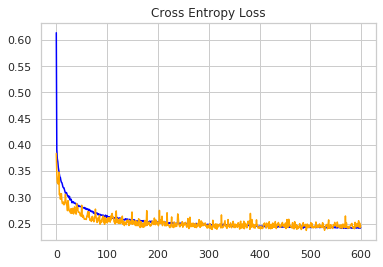

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(8,)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)


### Model 2 with sigmoid


Train on 14126 samples, validate on 6054 samples
Epoch 1/600
14126/14126 [==============================] - 1s 106us/step - loss: 0.5973 - val_loss: 0.4182
Epoch 2/600
14126/14126 [==============================] - 1s 55us/step - loss: 0.4635 - val_loss: 0.4164
Epoch 3/600
14126/14126 [==============================] - 1s 54us/step - loss: 0.4523 - val_loss: 0.4164
Epoch 4/600
14126/14126 [==============================] - 1s 54us/step - loss: 0.4488 - val_loss: 0.3998
Epoch 5/600
14126/14126 [==============================] - 1s 55us/step - loss: 0.4432 - val_loss: 0.3943
Epoch 6/600
14126/14126 [==============================] - 1s 55us/step - loss: 0.4419 - val_loss: 0.3918
Epoch 7/600
14126/14126 [==============================] - 1s 56us/step - loss: 0.4326 - val_loss: 0.3975
Epoch 8/600
14126/14126 [==============================] - 1s 60us/step - loss: 0.4295 - val_loss: 0.3819
Epoch 9/600
14126/14126 [==============================] - 1s 59us/step - loss: 0.4245 - val_loss: 0.3

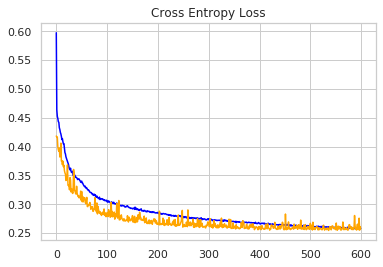

In [0]:
from keras.layers import Input, Dense
from keras.models import Model
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(8,)))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history=model.fit(X_train,y_train, batch_size=32, epochs=600, validation_data=(X_test, y_test))
summarize_diagnostics(history)